# Интерполяция функции многочленами Лагранжа и Чебышева.

В этой программе для интерполяции тем или иным способом использовались готовые решение из библиотек numpy и scipy.

In [1]:
import numpy
import scipy.interpolate
import matplotlib.pyplot as plt
import numpy.polynomial.chebyshev as chebpol

In [2]:
def f( x ) : #defining the function
    return 1.0 / ( 1.0 + 25 * x ** 2 )

Для интерполяции функции по n точкам как правило используется многочлен степени n. Мы можем проверить интерполяцию для разных n.

In [3]:
N = [ 5 , 7 , 11 , 15 ] #list of interpolating polynomial degrees

Для вывода графиков я использовал общую функцию. 

In [4]:
def plotting ( f , List , interpol_type ) : #generall function for plots
    
    xn = numpy.linspace ( -1 , 1, 201 ) # fragmentation

    for n in List :
        xvals = numpy.linspace ( -1 , 1, n )
        yvals = f ( xvals )  
        
        if interpol_type == 'lagrange' :
        
            The_Polynomial = scipy.interpolate.lagrange ( xvals , yvals )
            
            yn = [ The_Polynomial ( j ) for j in xn ]
        
        
        if interpol_type == 'chebyshev' :
            
            Cheby = chebpol.chebinterpolate ( lambda x : f ( x ), n )
            
            yn = chebpol.chebval ( xn , Cheby )
            
        plt.plot ( xn , yn )      #interpolated chart
        plt.plot( xn, f ( xn ) )  #exact chart

In [5]:
lag  = 'lagrange' #definition for interpol_type in 'plotting' function
cheb = 'chebyshev'

График интерполяции для многочленов Лагранжа:

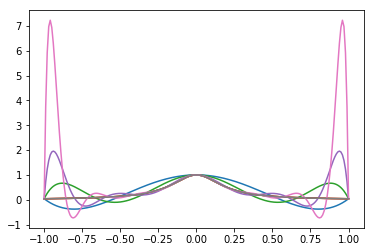

In [6]:
plotting(lambda x: f(x), N, lag)
plt.show()

График интерполяции для многочленов Чебышева:

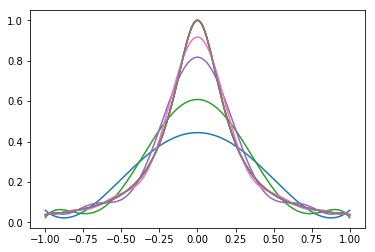

In [7]:
plotting(lambda x: f(x), N, cheb)
plt.show()

Очевидно, многочлены Чебышева справляются с задачей интерполяции много лучше, особенно в крайней области интерполяции, где многочлены Лагранжа могут вести себя абсолютно непредсказуемо.